In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from sqlalchemy import create_engine
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.model_selection import cross_val_score
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings(action='ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

houses.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [2]:
houses.isnull().sum()*100/houses.isnull().count().sort_values()

alley           93.767123
bedroomabvgr     0.000000
bldgtype         0.000000
bsmtcond         2.534247
bsmtexposure     2.602740
                  ...    
utilities        0.000000
wooddecksf       0.000000
yearbuilt        0.000000
yearremodadd     0.000000
yrsold           0.000000
Length: 81, dtype: float64

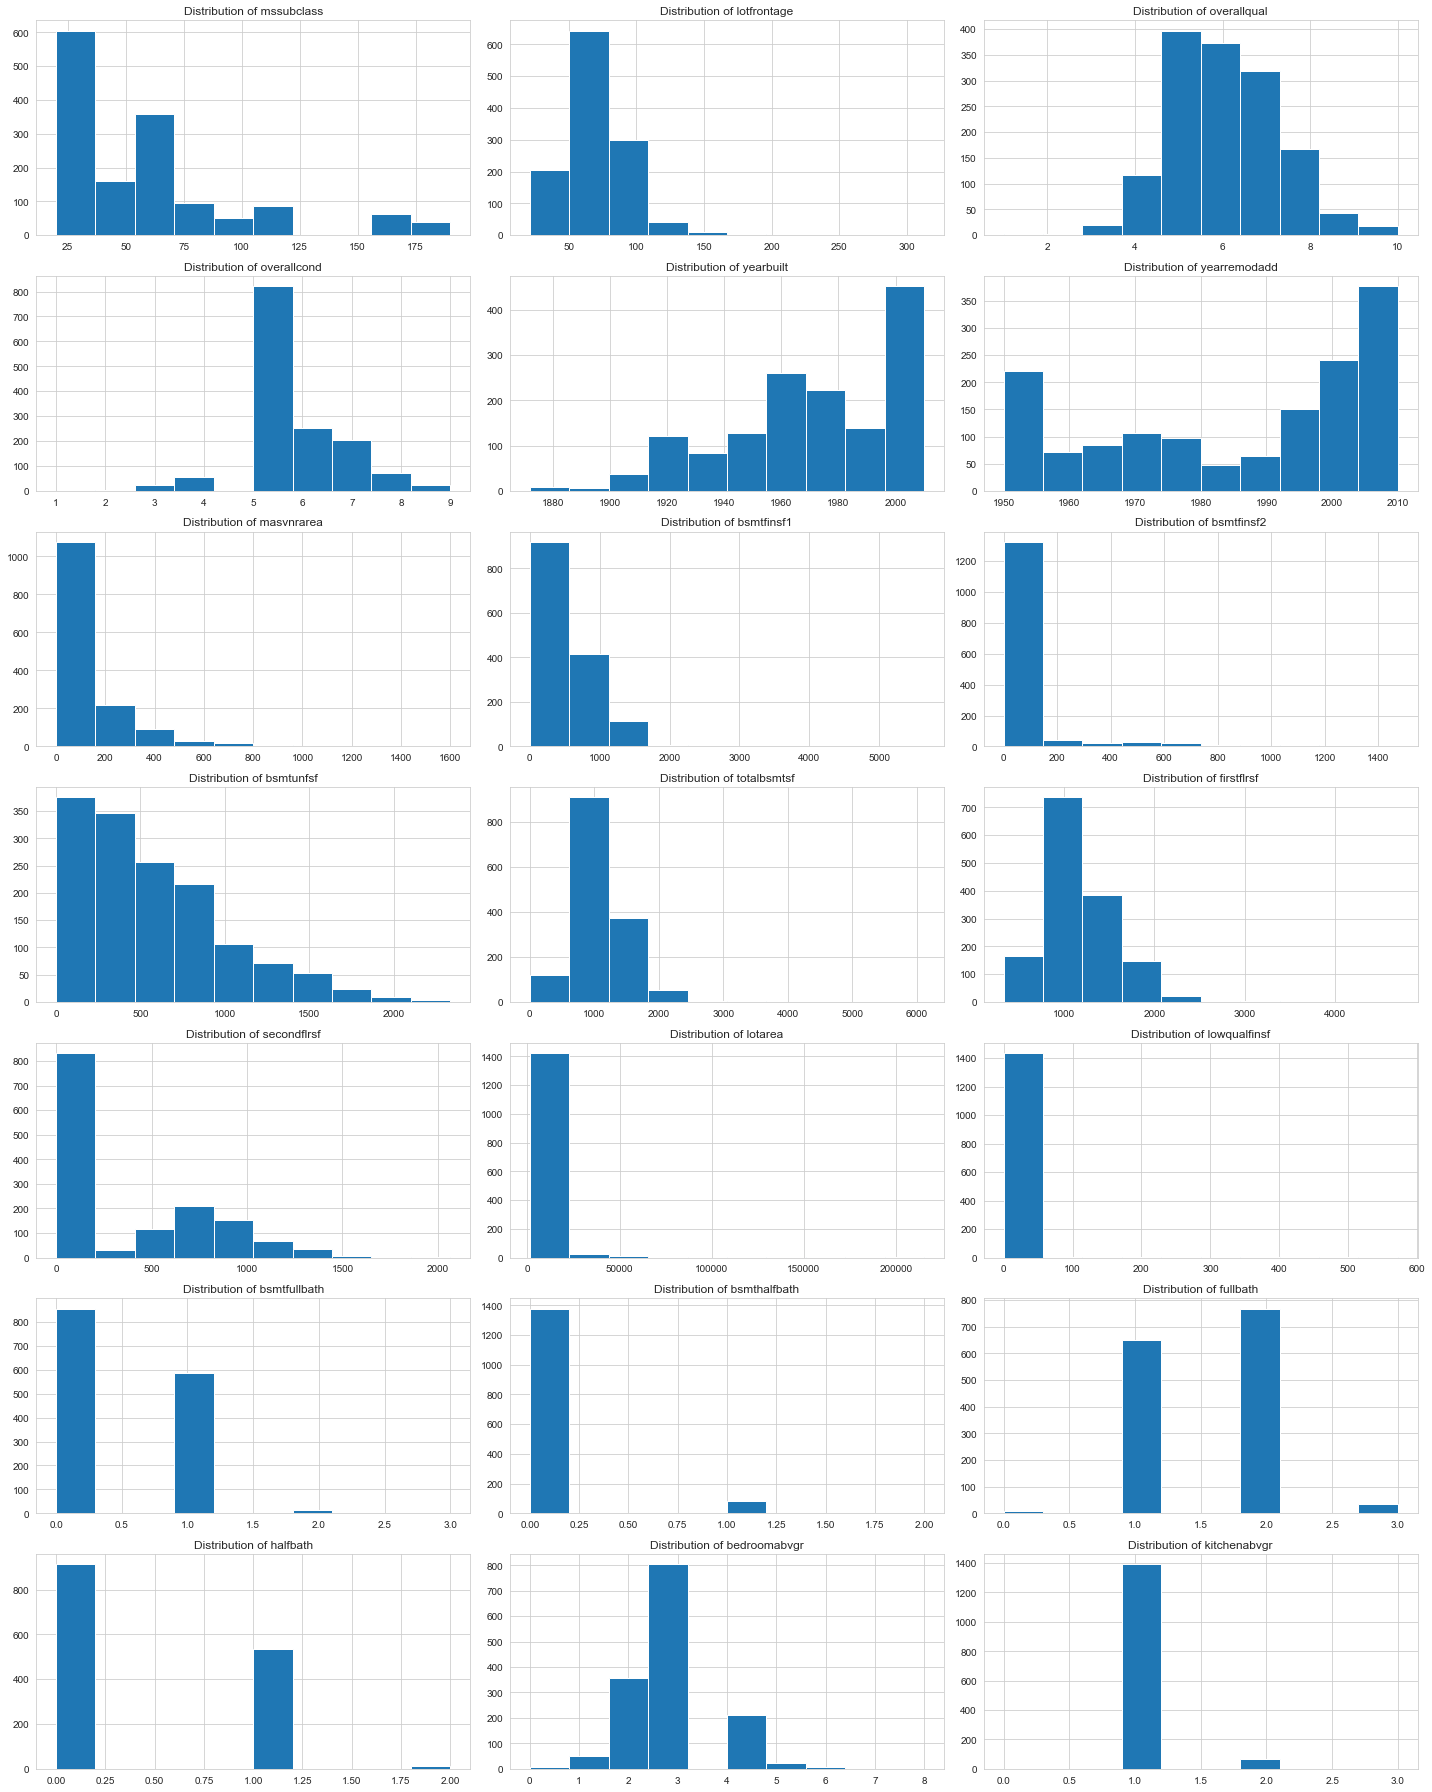

In [3]:
#Inspect data for outliers
sns.set_style('whitegrid')

plt.figure(figsize=(20,25))

plt.subplot(7, 3, 1)
plt.hist(houses.mssubclass)
plt.title('Distribution of mssubclass')

plt.subplot(7, 3, 2)
plt.hist(houses.lotfrontage)
plt.title('Distribution of lotfrontage')

plt.subplot(7, 3, 3)
plt.hist(houses.overallqual)
plt.title('Distribution of overallqual')

plt.subplot(7, 3, 4)
plt.hist(houses.overallcond)
plt.title('Distribution of overallcond')

plt.subplot(7, 3, 5)
plt.hist(houses.yearbuilt)
plt.title('Distribution of yearbuilt')

plt.subplot(7, 3, 6)
plt.hist(houses.yearremodadd)
plt.title('Distribution of yearremodadd')

plt.subplot(7, 3, 7)
plt.hist(houses.masvnrarea)
plt.title('Distribution of masvnrarea')

plt.subplot(7, 3, 8)
plt.hist(houses.bsmtfinsf1)
plt.title('Distribution of bsmtfinsf1')

plt.subplot(7, 3, 9)
plt.hist(houses.bsmtfinsf2)
plt.title('Distribution of bsmtfinsf2')

plt.subplot(7, 3, 10)
plt.hist(houses.bsmtunfsf)
plt.title('Distribution of bsmtunfsf')

plt.subplot(7, 3, 11)
plt.hist(houses.totalbsmtsf)
plt.title('Distribution of totalbsmtsf')

plt.subplot(7, 3, 12)
plt.hist(houses.firstflrsf)
plt.title('Distribution of firstflrsf')

plt.subplot(7, 3, 13)
plt.hist(houses.secondflrsf)
plt.title('Distribution of secondflrsf')

plt.subplot(7, 3, 14)
plt.hist(houses.lotarea)
plt.title('Distribution of lotarea')


plt.subplot(7, 3, 15)
plt.hist(houses.lowqualfinsf)
plt.title('Distribution of lowqualfinsf')


plt.subplot(7, 3, 16)
plt.hist(houses.bsmtfullbath)
plt.title('Distribution of bsmtfullbath')


plt.subplot(7, 3, 17)
plt.hist(houses.bsmthalfbath)
plt.title('Distribution of bsmthalfbath')


plt.subplot(7, 3, 18)
plt.hist(houses.fullbath)
plt.title('Distribution of fullbath')


plt.subplot(7, 3, 19)
plt.hist(houses.halfbath)
plt.title('Distribution of halfbath')


plt.subplot(7, 3, 20)
plt.hist(houses.bedroomabvgr)
plt.title('Distribution of bedroomabvgr')


plt.subplot(7, 3, 21)
plt.hist(houses.kitchenabvgr)
plt.title('Distribution of kitchenabvgr')


plt.tight_layout()
plt.show()

In [4]:
#Right winsorizing skewed distributions to handle outliers.

houses.lotfrontage= winsorize(houses.lotfrontage, (0, 0.05))
houses.masvnrarea= winsorize(houses.masvnrarea, (0, 0.05))
houses.bsmtfinsf1= winsorize(houses.bsmtfinsf1, (0, 0.05))
houses.bsmtfinsf2= winsorize(houses.bsmtfinsf2, (0, 0.05))
houses.totalbsmtsf= winsorize(houses.totalbsmtsf, (0, 0.05))
houses.firstflrsf= winsorize(houses.firstflrsf, (0, 0.05))
houses.secondflrsf= winsorize(houses.secondflrsf, (0, 0.05))
houses.lotarea= winsorize(houses.lotarea, (0, 0.05))
houses.lowqualfinsf= winsorize(houses.lowqualfinsf, (0, 0.05))

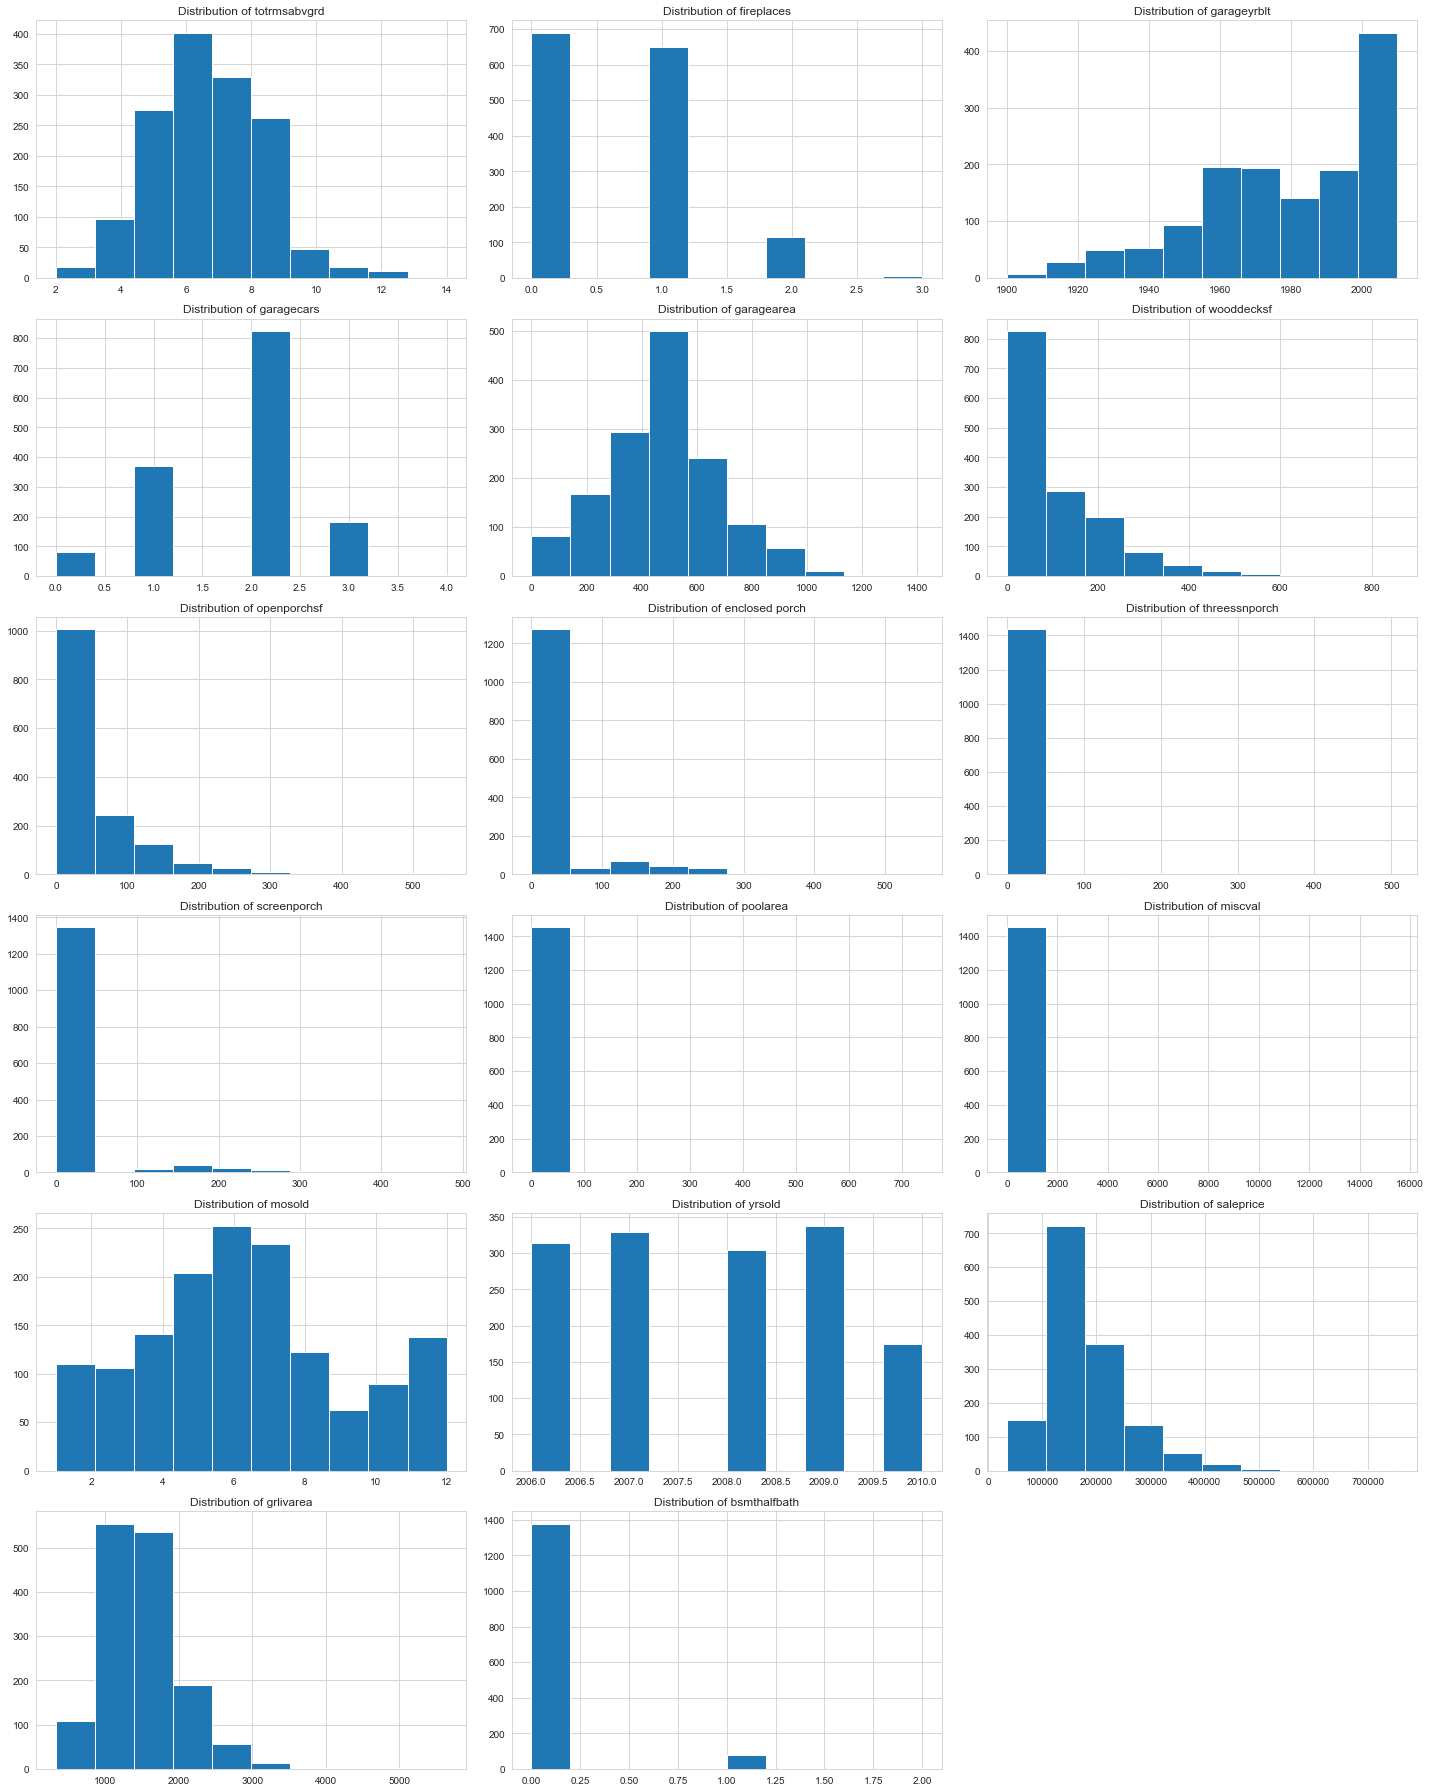

In [5]:
#Inspect data for outliers

plt.figure(figsize=(20,25))

plt.subplot(6, 3, 1)
plt.hist(houses.totrmsabvgrd)
plt.title('Distribution of totrmsabvgrd')

plt.subplot(6, 3, 2)
plt.hist(houses.fireplaces)
plt.title('Distribution of fireplaces')

plt.subplot(6, 3, 3)
plt.hist(houses.garageyrblt)
plt.title('Distribution of garageyrblt')

plt.subplot(6, 3, 4)
plt.hist(houses.garagecars)
plt.title('Distribution of garagecars')

plt.subplot(6, 3, 5)
plt.hist(houses.garagearea)
plt.title('Distribution of garagearea')

plt.subplot(6, 3, 6)
plt.hist(houses.wooddecksf)
plt.title('Distribution of wooddecksf')

plt.subplot(6, 3, 7)
plt.hist(houses.openporchsf)
plt.title('Distribution of openporchsf')

plt.subplot(6, 3, 8)
plt.hist(houses.enclosedporch)
plt.title('Distribution of enclosed porch')

plt.subplot(6, 3, 9)
plt.hist(houses.threessnporch)
plt.title('Distribution of threessnporch')

plt.subplot(6, 3, 10)
plt.hist(houses.screenporch)
plt.title('Distribution of screenporch')

plt.subplot(6, 3, 11)
plt.hist(houses.poolarea)
plt.title('Distribution of poolarea')

plt.subplot(6, 3, 12)
plt.hist(houses.miscval)
plt.title('Distribution of miscval')

plt.subplot(6, 3, 13)
plt.hist(houses.mosold)
plt.title('Distribution of mosold')

plt.subplot(6, 3, 14)
plt.hist(houses.yrsold)
plt.title('Distribution of yrsold')


plt.subplot(6, 3, 15)
plt.hist(houses.saleprice)
plt.title('Distribution of saleprice')


plt.subplot(6, 3, 16)
plt.hist(houses.grlivarea)
plt.title('Distribution of grlivarea')


plt.subplot(6, 3, 17)
plt.hist(houses.bsmthalfbath)
plt.title('Distribution of bsmthalfbath')


plt.tight_layout()
plt.show()

In [6]:
#Right winsorizing outliers pt. 2
houses.fireplaces= winsorize(houses.fireplaces, (0, 0.05))
houses.garagecars= winsorize(houses.garagecars, (0, 0.05))
houses.garagearea= winsorize(houses.garagearea, (0, 0.05))
houses.wooddecksf= winsorize(houses.wooddecksf, (0, 0.10))
houses.openporchsf= winsorize(houses.openporchsf, (0, 0.05))
houses.enclosedporch= winsorize(houses.enclosedporch, (0, 0.10))
houses.threessnporch= winsorize(houses.threessnporch, (0, 0.10))
houses.screenporch= winsorize(houses.screenporch, (0, 0.10))
houses.poolarea= winsorize(houses.poolarea, (0, 0.05))
houses.miscval= winsorize(houses.miscval, (0, 0.10))
houses.grlivarea= winsorize(houses.grlivarea, (0, 0.05))

In [7]:
#Eliminate variables with less than 60% entries filled
houses= houses.drop(columns={'alley', 'fireplacequ', 'poolqc', 'fence', 'miscfeature'})

In [8]:
#Sort variables by correlation to target
np.abs(houses.corr()['saleprice']).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.697678
garagecars       0.646652
garagearea       0.630196
totalbsmtsf      0.610873
firstflrsf       0.602473
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
fireplaces       0.469543
masvnrarea       0.458974
lotarea          0.432996
bsmtfinsf1       0.371463
openporchsf      0.366899
lotfrontage      0.351799
wooddecksf       0.340151
halfbath         0.284108
secondflrsf      0.280956
bsmtfullbath     0.227122
bsmtunfsf        0.214479
enclosedporch    0.177004
bedroomabvgr     0.168213
kitchenabvgr     0.135907
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
bsmtfinsf2       0.045131
yrsold           0.028923
id               0.021917
bsmthalfbath     0.016844
lowqualfinsf          NaN
threessnporch         NaN
screenporch           NaN
poolarea              NaN
miscval               NaN
Name: salepr

As the top 10 features correlated with saleprice have no missing values, only the outliers need treatment. 

Text(0.5, 1.0, 'Distribution of target variable')

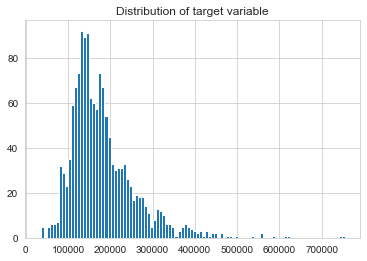

In [9]:
#Inspect Target Variable
plt.hist(houses.saleprice, bins=100)
plt.title('Distribution of target variable')

In [10]:
#Target has strong right skew, log transforming to normalize distribution
houses.saleprice= np.log1p(houses.saleprice)

In [11]:
#Cleaned variables
from scipy.stats.mstats import winsorize
houses.garagecars= winsorize(houses.garagecars, (0, 0.05))
houses.grlivarea= winsorize(houses.grlivarea, (0, 0.05))
houses.totalbsmtsf= winsorize(houses.totalbsmtsf, (0, 0.05))
houses.firstflrsf= winsorize(houses.firstflrsf, (0, 0.05))

In [12]:
houses['totalsf']=houses.firstflrsf + houses.secondflrsf + houses.totalbsmtsf

In [13]:
#Adding dummy variables to model from categorical variables
houses= pd.concat([houses, pd.get_dummies(houses.exterqual, prefix='exterqual', drop_first=True)], axis=1)
houses= pd.concat([houses, pd.get_dummies(houses.housestyle, prefix='housestyle', drop_first=True)], axis=1)

dummy_column_names = list(pd.get_dummies(houses.exterqual, prefix="exterqual", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houses.housestyle, prefix="housestyle", drop_first=True).columns)

In [14]:
#Create neighborhood dummies
houses=pd.concat([houses, pd.get_dummies(houses.neighborhood, prefix='neighborhood', drop_first=True)], axis=1)
dummy_column_names= dummy_column_names + list(pd.get_dummies(houses.neighborhood, prefix='neighborhood', drop_first=True))

In [15]:
#New model with neighborhood dummies added
Y=houses.saleprice

houses['qual_by_area']= houses.overallqual * houses.grlivarea
X=houses[['overallqual', 'garagearea', 'garagecars', 'totalsf', 'grlivarea']+ dummy_column_names]


X=sm.add_constant(X)

results=sm.OLS(Y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     229.2
Date:                Tue, 24 Sep 2019   Prob (F-statistic):               0.00
Time:                        22:02:45   Log-Likelihood:                 719.18
No. Observations:                1460   AIC:                            -1358.
Df Residuals:                    1420   BIC:                            -1147.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8683 

1. Split your data into train and test sets where 20% of the data resides in the test set.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))



The number of observations in training set is 1168
The number of observations in test set is 292


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

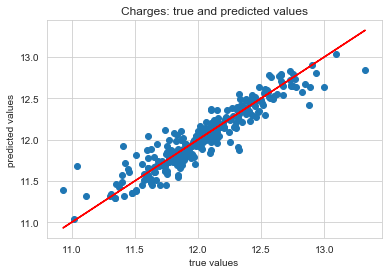

R-squared of the model in training set is: 0.8611170872007702
-----Test set statistics-----
R-squared of the model in test set is: 0.8646454192585535
Mean absolute error of the prediction is: 0.10185347891017339
Mean squared error of the prediction is: 0.020148654375328628
Root mean squared error of the prediction is: 0.14194595582590097
Mean absolute percentage error of the prediction is: 0.8481779410031454


In [17]:
#Fit a model-Linear Regression
lrm=LinearRegression()
lrm.fit(X_train, y_train)

# Making predictions here
y_preds = lrm.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))

2. Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

In [21]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

#Establish range of alphas
alphas= [np.power(10.0, p) for p in range (-10, 20, 1)]

regr= RidgeCV(alphas=alphas, cv=10)

#Fit Ridge regression & predict
regr.fit(X_train, y_train)

print("Best alpha value is: {}".format(regr.alpha_))
print("R-squared of the model on the training set is: {}".format(regr.score(X_train, y_train)))

Best alpha value is: 1.0
R-squared of the model on the training set is: 0.8609526943722627


In [22]:
#Fit Lasso and train
regr=LassoCV(alphas=alphas, cv=10)

regr.fit(X_train, y_train)

print("Best alpha value is: {}".format(regr.alpha_))
print("R-squared of the model on the training set is: {}".format(regr.score(X_train, y_train)))

Best alpha value is: 0.0001
R-squared of the model on the training set is: 0.8608985469087574


In [23]:
regr=ElasticNetCV(alphas=alphas, cv=10)

regr.fit(X_train, y_train)
y_preds_test=regr.predict(X_test)

print("Best alpha value is: {}".format(regr.alpha_))
print("R-squared of the model on the training set is: {}".format(regr.score(X_train, y_train)))

Best alpha value is: 0.0001
R-squared of the model on the training set is: 0.86103739482927


3. Evaluate your best model on the test set.

In [25]:
#Due to highest R-squared score, Use Linear Regression model on test set
#Fit a model-Linear Regression
lrm=LinearRegression()
lrm.fit(X_train, y_train)

y_preds=lrm.predict(X_test)

print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

-----Test set statistics-----
R-squared of the model in test set is: 0.8646454192585535
Mean absolute error of the prediction is: 0.10185347891017339
Mean squared error of the prediction is: 0.020148654375328628
Root mean squared error of the prediction is: 0.14194595582590097
Mean absolute percentage error of the prediction is: 0.8481779410031454


4. So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

In [59]:
houses.yrsold.describe()

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
25%      2007.000000
50%      2008.000000
75%      2009.000000
max      2010.000000
Name: yrsold, dtype: float64

In [39]:
#Integrate yearly average interest rate & GDP to dataframe 
ratesdict= {2006:6.53, 2007:6.58, 2008:6.62, 2009:5.59, 2010:5.08}
houses['interestrate']= houses.yrsold.map(ratesdict)

GDPdict={2006: 2.59, 2007:1.97, 2008: -2.75, 2009:0.18, 2010: 2.57}
houses['GDPrate']= houses.yrsold.map(GDPdict)

Text(0.5, 0, 'Mortgage Interest Rate')

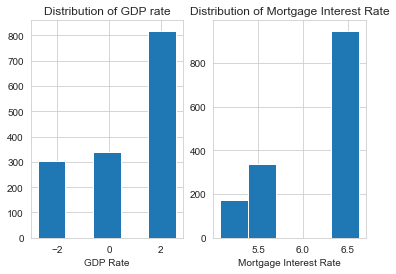

In [43]:
#Examine new variables
plt.subplot(1, 2, 1)
plt.hist(houses.GDPrate, bins=5)
plt.xlabel('GDP Rate')
plt.title('Distribution of GDP rate')

plt.subplot(1, 2, 2)
plt.hist(houses.interestrate, bins=5)
plt.title('Distribution of Mortgage Interest Rate')
plt.xlabel('Mortgage Interest Rate')

In [48]:
#Add in new variable to linear regression model
X=houses[['overallqual', 'garagearea', 'garagecars', 'totalsf', 'grlivarea', 'interestrate', 'GDPrate']+ dummy_column_names]

lrm=LinearRegression()
lrm.fit(X_train, y_train)

y_preds=lrm.predict(X_test)

X=sm.add_constant(X)

results=sm.OLS(Y,X).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     217.8
Date:                Wed, 25 Sep 2019   Prob (F-statistic):               0.00
Time:                        18:42:44   Log-Likelihood:                 719.68
No. Observations:                1460   AIC:                            -1355.
Df Residuals:                    1418   BIC:                            -1133.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   10.8347 

In [49]:
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

-----Test set statistics-----
R-squared of the model in test set is: 0.8646454192585535
Mean absolute error of the prediction is: 0.10185347891017339
Mean squared error of the prediction is: 0.020148654375328628
Root mean squared error of the prediction is: 0.14194595582590097
Mean absolute percentage error of the prediction is: 0.8481779410031454


The new GDP and interest rate variables both had an insignificant p-value in the last OLS regression model, and did not improve R-Squared or the adjusted R-squared. 